In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dct



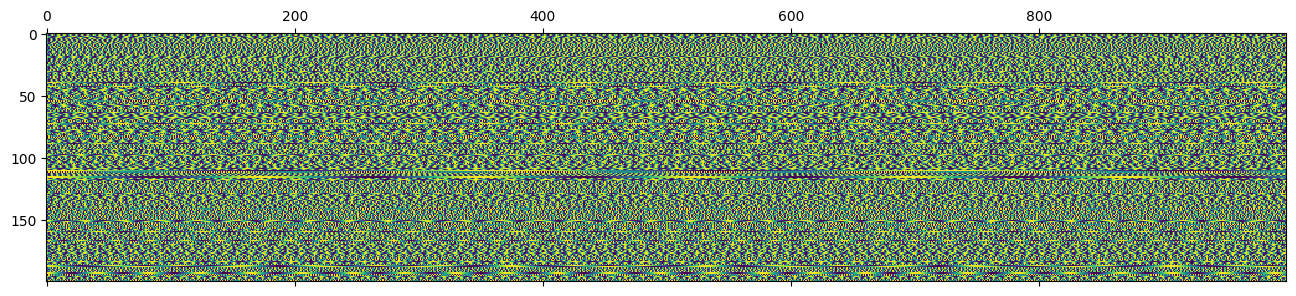

In [253]:
plt.matshow(D)

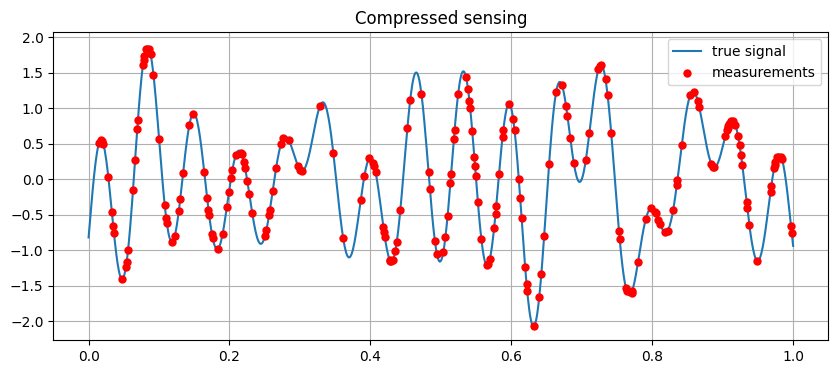

In [266]:
N = 1000
t = np.linspace(0, 1, N)

m = 4
x = 0
for i in range(m):
    x += np.random.uniform(-1, 1) * np.sin(np.random.uniform(3, 200) * t)
    x += np.random.uniform(-1, 1) * np.cos(np.random.uniform(30, 50) * t)
#x -= x.min() -1
plt.figure(figsize=(10,4))
plt.title("Compressed sensing")
plt.plot(t,x, label='true signal')

n = int(.2 *N)
import random
s = random.sample(range(N), n)
#s.sort()


Psi = dct(np.eye(N), axis=0)
y = Psi @ x

Psiinv = np.linalg.inv(Psi)

C = np.zeros((n,N))
for i, v in enumerate(s):
    C[i, v] = 1

D = C @ Psiinv    

tobs = C@t; xobs = C@x
plt.grid()
plt.scatter(tobs, xobs, c='r', label='measurements',zorder=3,linewidth=.01);
plt.legend();

## We are looking for $y$ such that

Let $x$ be true signal.

$y = \Psi x$ is its cosine transform

Only data we have is $x^{obs}$
$$
x^{obs} = Cx = C\Psi^{-1}y
$$

Let's call $D = C\Psi^{-1}$.

We are looking for $y$ such that $Dy = x^{obs}$

In the meantime, we want $y$ to be as sparse as possible. That is we want to

$$
min \; ||y||_1\; s.t.\, Dy = x^{obs}
$$

which can be reformulated

$$
min \; ||y||_1 + \lambda ||Dy - x^{obs}||_2^2
$$

with a high $\lambda$.



And the reconstructed signal is $\hat{x} = \Psi^{-1} y^\star$ , with $y^\star$ the solution of the optimisation problem.

In [ ]:
from scipy.optimize import minimize
import numpy as np



def cost_function(y, l):
    return l * np.mean(np.abs(y)) + np.mean((D @ y - xobs)**2)

y0 = np.ones(N)
l = 1
output = minimize(cost_function, y0, args=(l,))
print(output.message)

ystar = output.x

x_hat = Psiinv @ ystar

In [ ]:
help(minimize)

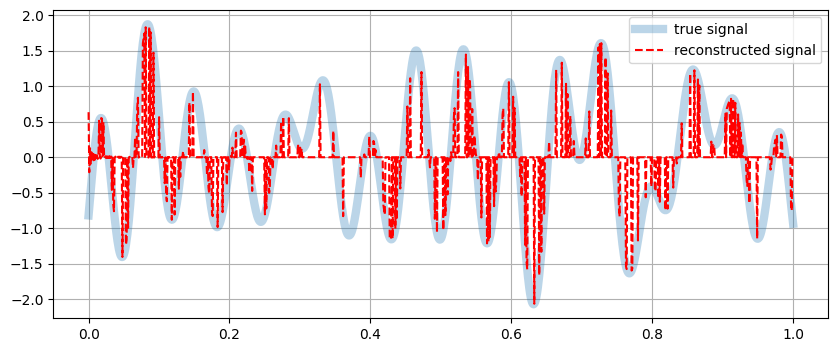

In [277]:
plt.figure(figsize=(10,4))
plt.grid()
plt.plot(t, x, label='true signal', linewidth=6,alpha=.3)
plt.plot(t, x_hat, c='r', zorder=2, label='reconstructed signal', linestyle='--');
plt.legend();

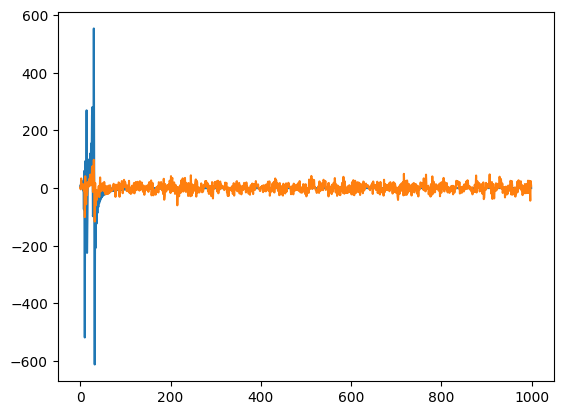

In [278]:
plt.plot(y)
plt.plot(ystar)
